In [2]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from pylab import rcParams
import mglearn


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, cross_validate
from scipy.stats import uniform,loguniform
import warnings
warnings.filterwarnings("ignore")

np.random.seed(seed=0)

In [3]:
cancer = load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

# RandomizedSearchCV loguniform destribution

## [10^-9, 10^9]

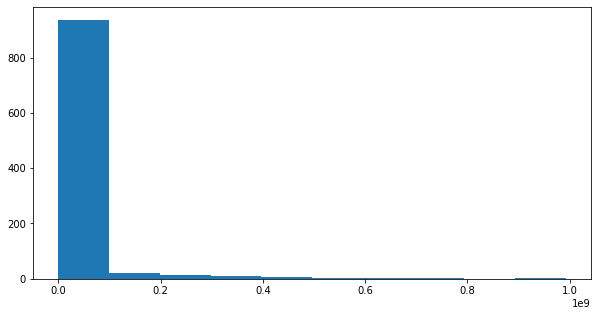

In [5]:
destribution_log = loguniform(10**(-9),10**9).rvs(1000)
rcParams['figure.figsize'] = 10, 5
plt.hist(destribution_log)
plt.show()

In [6]:
param_grid_log =  {'C': loguniform(10**(-9),10**9)}
random_search_log = RandomizedSearchCV(LogisticRegression(),param_distributions = param_grid_log, 
                                   n_iter = 100, cv = 5,return_train_score=True, random_state = 0)
random_search_log.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12459a3c8>},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

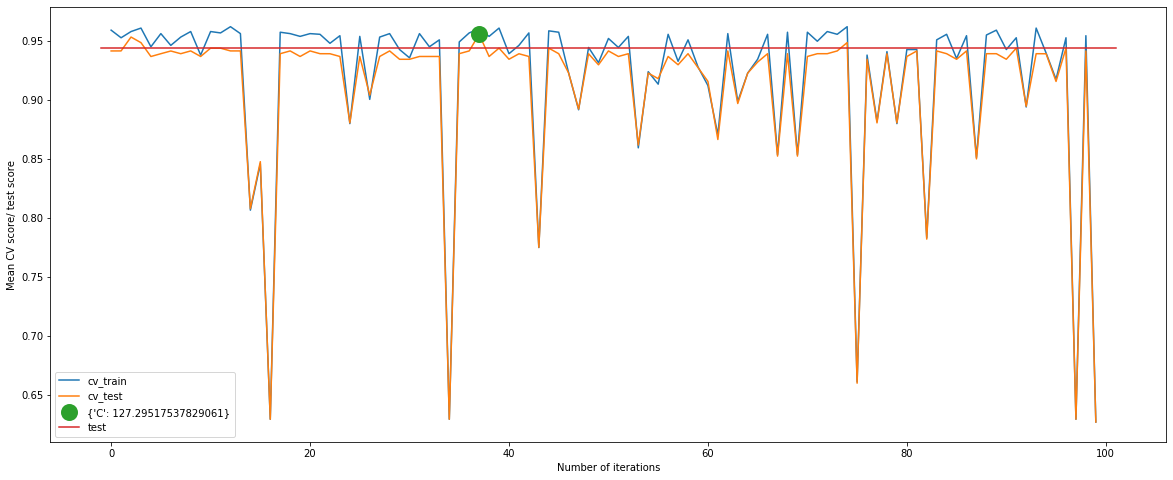

In [7]:
best_C = random_search_log.best_params_
num_iter = random_search_log.n_iter
best_point = random_search_log.best_index_

cv_train_mean_scores = random_search_log.cv_results_['mean_train_score']
cv_test_mean_scores = random_search_log.cv_results_['mean_test_score']
test_score = random_search_log.score(X_test,y_test)

rcParams['figure.figsize'] = 20, 8
plt.plot(np.arange(0,num_iter,1), cv_train_mean_scores, label = 'cv_train')
plt.plot(np.arange(0,num_iter,1), cv_test_mean_scores, label = 'cv_test')
plt.plot(np.arange(0,num_iter,1)[best_point], cv_test_mean_scores[best_point], 'o',markersize=15, mew = 2,
         label = '{}'.format(best_C))
plt.plot([-1,num_iter+1], [test_score,test_score], label = 'test')
plt.xlabel('Number of iterations')
plt.ylabel('Mean CV score/ test score')
plt.legend(loc = 'best')
plt.show()

In [8]:
print("Best parameter {}".format(best_C))
print('Средняя правильность на тренировочном наборе при CrossValidation: {:.2f}'.format(np.mean(cv_train_mean_scores)))
print('Средняя правильность на тестовом наборе при CrossValidation: {:.2f}'.format(np.mean(cv_test_mean_scores)))
print('Правильность на тестовом наборе: {:.2f}'.format(test_score))

Best parameter {'C': 127.29517537829061}
Средняя правильность на тренировочном наборе при CrossValidation: 0.92
Средняя правильность на тестовом наборе при CrossValidation: 0.91
Правильность на тестовом наборе: 0.94


# GridSearchCV

In [9]:
param_grid = {'C': np.power(10, np.arange(-9, 9, dtype=float))}

In [10]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

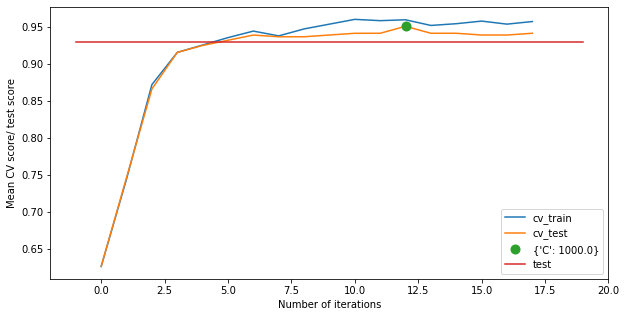

In [11]:
best_C = grid_search.best_params_
num_iter = len(grid_search.cv_results_['params'])
best_point = grid_search.best_index_

cv_train_mean_scores = grid_search.cv_results_['mean_train_score']
cv_test_mean_scores = grid_search.cv_results_['mean_test_score']
test_score = grid_search.score(X_test,y_test)

rcParams['figure.figsize'] = 10, 5
plt.plot(np.arange(0,num_iter,1), cv_train_mean_scores, label = 'cv_train')
plt.plot(np.arange(0,num_iter,1), cv_test_mean_scores, label = 'cv_test')
plt.plot(np.arange(0,num_iter,1)[best_point], cv_test_mean_scores[best_point], 'o',markersize=8, mew = 2,
         label = '{}'.format(best_C))
plt.plot([-1,num_iter+1], [test_score,test_score], label = 'test')
plt.xlabel('Number of iterations')
plt.ylabel('Mean CV score/ test score')
plt.legend(loc = 'best')
plt.show()

In [13]:
print("Best parameter {}".format(best_C))
print('Средняя правильность на тренировочном наборе при CrossValidation: {:.2f}'.format(np.mean(cv_train_mean_scores)))
print('Средняя правильность на тестовом наборе при CrossValidation: {:.2f}'.format(np.mean(cv_test_mean_scores)))
print('Правильность на тестовом наборе: {:.2f}'.format(test_score))

Best parameter {'C': 1000.0}
Средняя правильность на тренировочном наборе при CrossValidation: 0.91
Средняя правильность на тестовом наборе при CrossValidation: 0.91
Правильность на тестовом наборе: 0.93


# Best estimators GridSearchCV and RandomizedSearchCV

In [14]:
grid_search.best_estimator_

LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
random_search_log.best_estimator_

LogisticRegression(C=127.29517537829061, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

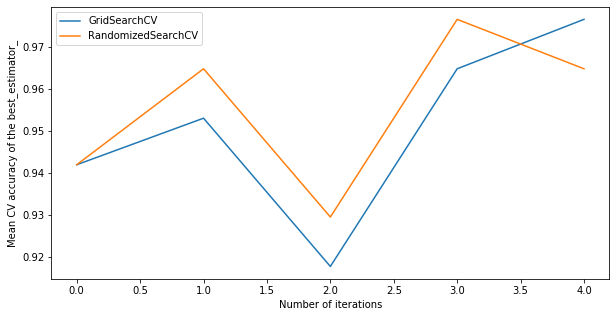

In [16]:
GridS = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
RandS = cross_val_score(random_search_log.best_estimator_, X_train, y_train, cv=5)

plt.plot(np.arange(0,len(GridS),1), GridS, label = 'GridSearchCV')
plt.plot(np.arange(0,len(RandS),1), RandS, label = 'RandomizedSearchCV')
plt.xlabel('Number of iterations')
plt.ylabel('Mean CV accuracy of the best_estimator_')
plt.legend(loc = 'best')
plt.show()